In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import itertools
from tensorflow.keras.datasets import fashion_mnist


**INCARCAREA SI PROCESAREA DATELOR**

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Train labels shape: (60000,)
Test labels shape: (10000,)
Train data after the normalization (Max_value: 1.0 , Min_value: 0.0)
Test data after the normalization: (10000, 28, 28)
Example of a training data point: 9 -> Ankle boot


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

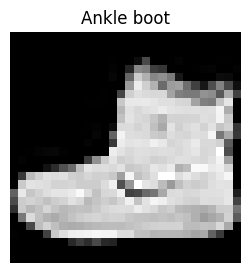

In [2]:
(train_data,train_label),(test_data,test_label)=fashion_mnist.load_data()
class_name=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Train labels shape:", train_label.shape)
print("Test labels shape:", test_label.shape)
train_data = train_data/255.0
test_data = test_data/255.0

print(f"Train data after the normalization (Max_value: {train_data.max()} , Min_value: {train_data.min()})" )
print("Test data after the normalization:", test_data.shape)
print(f"Example of a training data point: {train_label[0]} -> {class_name[train_label[0]]}" )
plt.figure(figsize=(3,3))
plt.imshow(train_data[0], cmap='gray')
plt.title(class_name[train_label[0]])
plt.axis('off')

**CONSTRUIREA MODELULUI**

In [34]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model_history=model.fit(train_data,train_label,epochs=20,validation_data=(test_data,test_label))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8184 - loss: 0.5199 - val_accuracy: 0.8368 - val_loss: 0.4426
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8610 - loss: 0.3862 - val_accuracy: 0.8468 - val_loss: 0.4089
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8720 - loss: 0.3510 - val_accuracy: 0.8515 - val_loss: 0.3952
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8797 - loss: 0.3282 - val_accuracy: 0.8516 - val_loss: 0.3977
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8857 - loss: 0.3091 - val_accuracy: 0.8544 - val_loss: 0.3926
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8909 - loss: 0.2951 - val_accuracy: 0.8578 - val_loss: 0.3837
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8952 - loss: 0.2829 - val_accuracy: 0.8599 - val_loss: 0.3894
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8987 - loss: 0.2709 - 

In [56]:
tf.random.set_seed(42)

model2=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

learning_rate=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
model2_history=model2.fit(train_data,train_label,epochs=20,validation_data=(test_data,test_label),callbacks=[learning_rate])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8152 - loss: 0.5286 - val_accuracy: 0.8411 - val_loss: 0.4356 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8618 - loss: 0.3875 - val_accuracy: 0.8558 - val_loss: 0.3999 - learning_rate: 0.0011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8715 - loss: 0.3557 - val_accuracy: 0.8606 - val_loss: 0.3853 - learning_rate: 0.0013
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8778 - loss: 0.3377 - val_accuracy: 0.8639 - val_loss: 0.3775 - learning_rate: 0.0014
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8819 - loss: 0.3229 - val_accuracy: 0.8627 - val_loss: 0.3785 - learning_rate: 0.0016
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8842 - loss: 0.3146 - val_accuracy: 0.8703 - val_loss: 0.3626 - learning_rate: 0.0018
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8875 - l

**EVALUARE PERFORMANTEI**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8713 - loss: 0.4157  
The loss is 41.57% and the accuracy is 87.13%


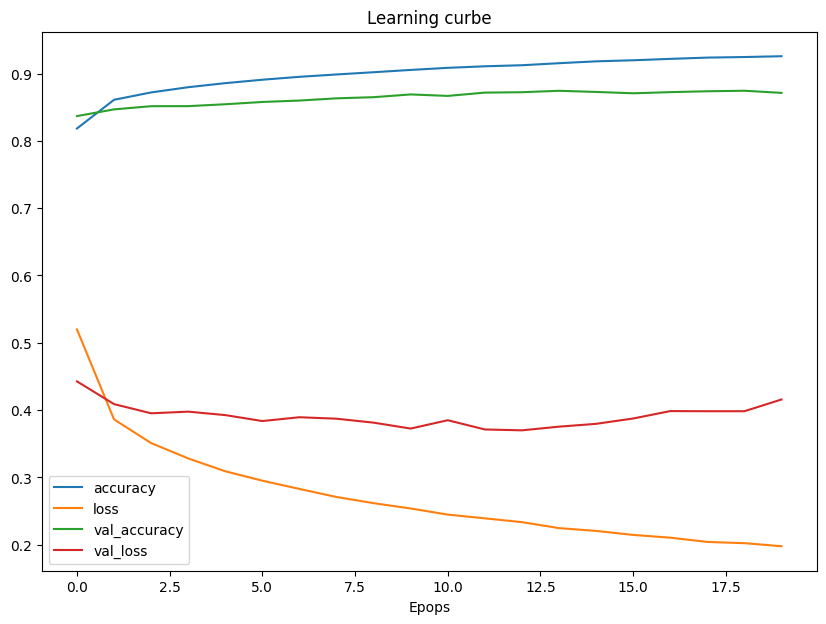

In [37]:
loss,accuracy=model.evaluate(test_data,test_label)
print(f"The loss is {(loss*100):.2f}% and the accuracy is {(accuracy*100):.2f}%")

pd.DataFrame(model_history.history).plot(title="Learning curbe",figsize=(10,7))
plt.xlabel("Epops")
plt.show()

Text(0.5, 1.0, 'Finding the ideal learning rate')

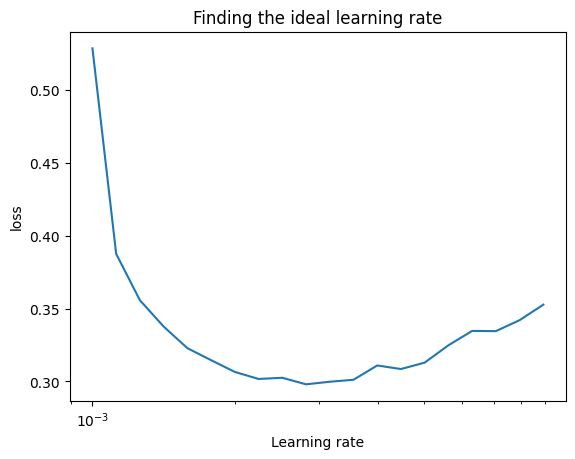

In [110]:
lrs=1e-3*10**(np.arange(20)/20)
plt.semilogx(lrs,model2_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Finding the ideal learning rate")


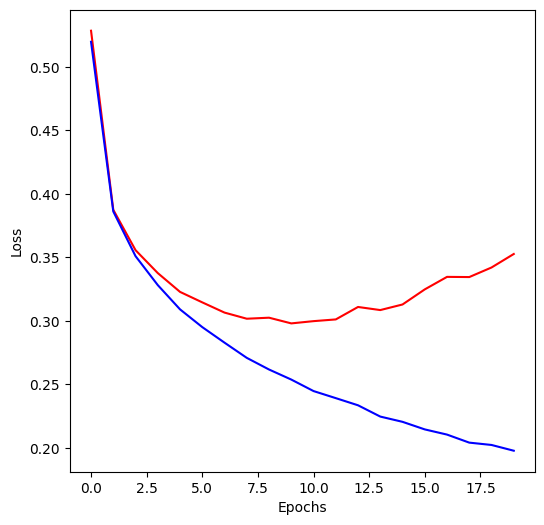

In [117]:
plt.figure(figsize=(6,6))
plt.plot(model2_history.history['loss'],color='r')
plt.plot(model_history.history['loss'],color='b')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
Predictions [9 2 1 ... 8 1 5]


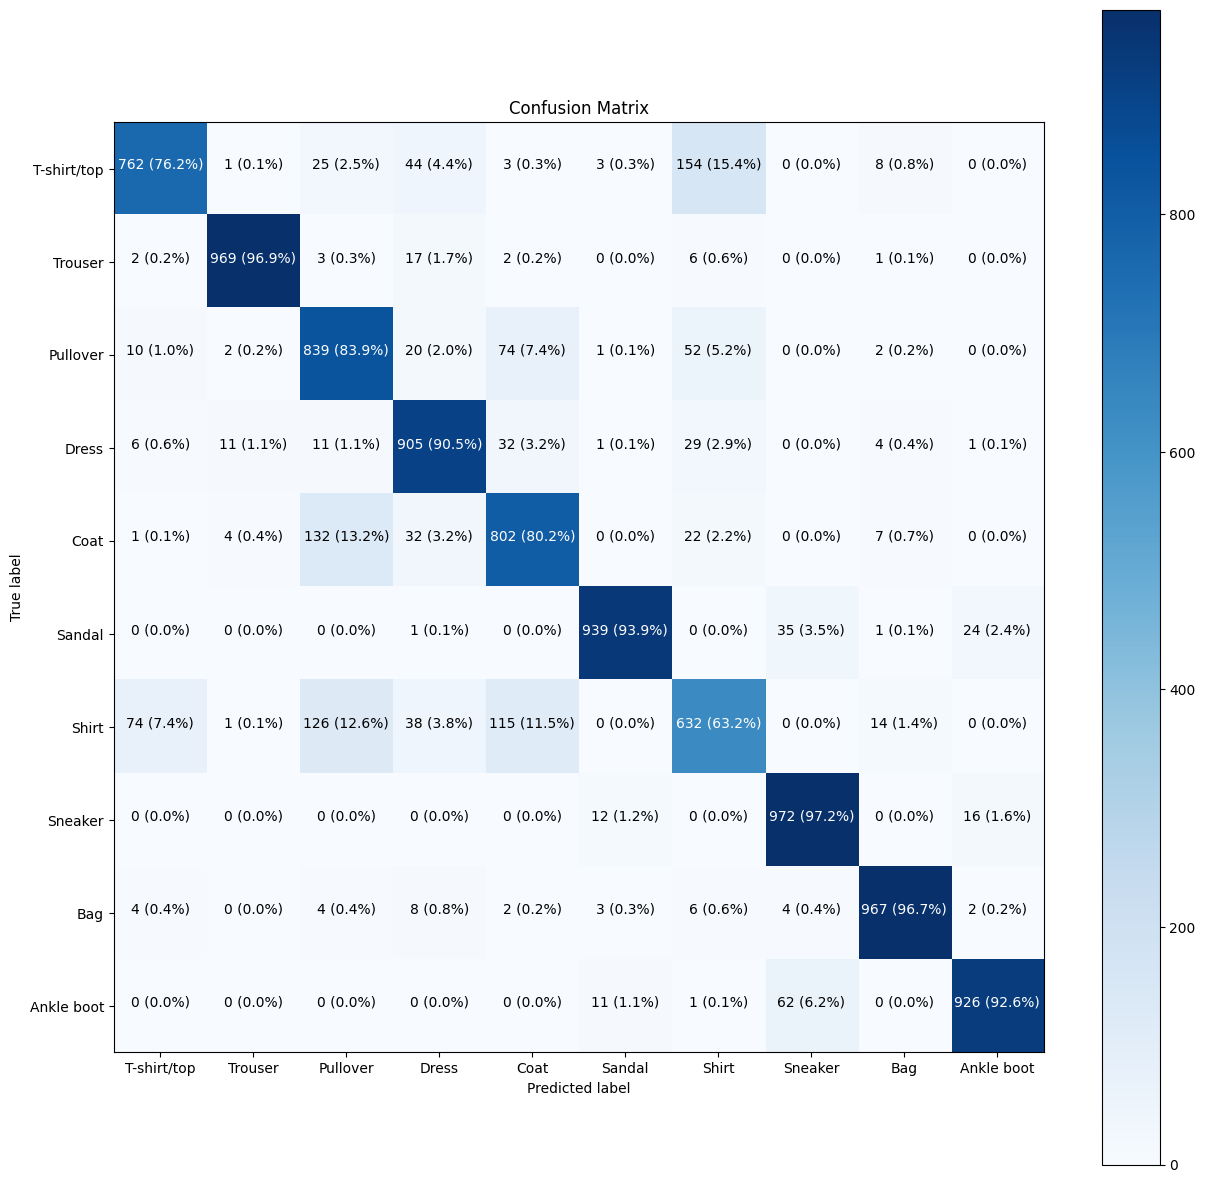

In [47]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=10):
    """Creează o matrice de confuzie frumoasă și ușor de citit."""
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)
    plt.show()

y_probs = model.predict(test_data)
y_preds = y_probs.argmax(axis=1)
print(f"Predictions {y_preds}")
make_confusion_matrix(y_true=test_label, y_pred=y_preds, classes=class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


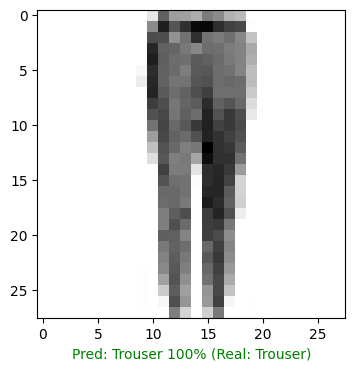

In [118]:
import random 
def plot_random_image(model, images, true_labels, classes):
    """Alegem o imagine random și verifica predictia modelului."""
    plt.figure(figsize=(4,4))
    i = random.randint(0, len(images))
    
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # Reshape pentru batch
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    color = "green" if pred_label == true_label else "red"
    
    plt.xlabel("Pred: {} {:2.0f}% (Real: {})".format(
        pred_label,
        100*tf.reduce_max(pred_probs),
        #Aceasta functie cauta valoarea maxima din lista (nu indexul, ci numarul efectiv).
        true_label
    ), color=color)
    plt.show()


plot_random_image(model, test_data, test_label, class_name)